In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:


from thompson_sampling.models import BatchBayesLinReg

from thompson_sampling.solvers import GaussianUniversalContextualSampler

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
gucs = GaussianUniversalContextualSampler(BatchBayesLinReg,num_arms=2, num_context = 1,model_params={'alpha':1, 'beta':4})

In [ ]:
np.mean([ gucs.choose_arm(context = np.array([1]),num_samples = 1) for x in range(100)])

0.48

# Neural Network


In [ ]:
import numpy as np

# X = (hours studying, hours sleeping), y = score on test
xAll = np.array(([2, 9], [1, 5], [3, 6], [5, 10]), dtype=float) # input data
y = np.array(([92], [86], [89]), dtype=float) # output

# scale units
xAll = xAll/np.amax(xAll, axis=0) # scaling input data
#y = y/100 # scaling output data (max test score is 100)

# split data
X = np.split(xAll, [3])[0] # training data
xPredicted = np.split(xAll, [3])[1] # testing data

class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        #o = self.sigmoid(self.z3) # final activation function
        o = self.z3
        return o

    def sigmoid(self, s):
    # activation function
        return 1/(1+np.exp(-s))

    def sigmoidPrime(self, s):  #derivative of sigmoid  
        return s * (1 - s)

    def backward(self, y, o):  # backward propagate through the network  
        self.o_error = np.sqrt(y - o)^2 # error in output  
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error  
        
        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error  
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error  
        
        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights  
        self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

        
    def train (self, X, y):  
        o = self.forward(X)  
        self.backward(X, y, o)
     
    
    def predict(self):
        return self.forward(xPredicted)

NN = Neural_Network()

#defining our output
o = NN.forward(X)

print("Predicted Output: \n" + str(o))
print("Actual Output: \n" + str(y))


Predicted Output: 
[[-1.28989135]
 [-1.4045154 ]
 [-1.48707784]]
Actual Output: 
[[92.]
 [86.]
 [89.]]


In [ ]:
NN = Neural_Network()

x_vec = [] # array to store iteration count
y_data = [] # array to store loss values

for i in range(20): # trains the NN 1,000 times
  #print("# " + str(i) + "\n")
  #print("Input (scaled): \n" + str(X))
  #print("Actual Output: \n" + str(y))
  #print("Predicted Output: \n" + str(NN.forward(X)))
  loss = str(np.mean(np.square(y - NN.forward(X))))
  #print("Loss: \n" +  loss ) # mean sum squared loss
  #print("\n")
  x_vec.append(i)
  y_data.append(np.round(float(loss), 6))

  NN.train(X, y)
    
    
plt.cla()
plt.title("Loss over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(x_vec, y_data)
plt.pause(.001)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
NN.z2.shape

(3, 3)

In [ ]:
z3 = np.dot(NN.z2, NN.W2)

In [ ]:
z3

array([[1.85281932],
       [1.58603116],
       [1.85504781]])

In [ ]:
class NeuralNetwork(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.z3
        return o

    def sigmoid(self, s):
    # activation function
        return 1/(1+np.exp(-s))
    
    def ReLU(x):
        x[x>0] = 0
        return x

    def sigmoidPrime(self, s):  #derivative of sigmoid  
        return s * (1 - s)
    
    
    def backward(self, X, y):  # backward propagate through the network 
        
        o = self.forward(X)
        
        self.o_error = np.sqrt(y - o)**2 # error in output  
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error  
        
        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error  
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error  
        
        
        
        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights  
        self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights



In [ ]:
nn = NeuralNetwork()

In [ ]:
nn.forward([10,2]), nn.forward([100,2]), nn.forward([10,20])

(array([0.05564552]), array([0.23095189]), array([-0.39628506]))

In [ ]:
nn.backward(np.array([1,2]),np.array([1]))

ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

In [ ]:
class NeuralNetwork(object):
    """https://wiseodd.github.io/techblog/2016/06/21/nn-sgd/"""
    def __init__(self, n_features, n_hidden):
        self.W1 = np.random.randn(n_features, n_hidden)
        self.W2 = np.random.randn(n_hidden, 1) #regression ha 1 output
        
    def relu(self, x):
        x[x <= 0] = 0
        return x
    
    def relu_prime(self,x):
        x[x <= 0] =0
        x[x>0] = 1
        return x
    
    
    
    
    
    def sigmoid(self, s):
        # activation function
        return 1 / (1 + np.exp(-s))

    def sigmoid_prime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def forward(self,X):
        h = X.T @ self.W1
        
        a1 = X.T @ self.W1
        z1 = self.relu(a1)
        
        a2 = z1 @self.W2
        
        output = a2 #regression
        
        assert output.shape[0] == 1
        

        return output
    
    def compute_error(self, pred,y):
        return np.sqrt((pred-y)**2)
    
    def backward(self,X,y):
        
        a2 = self.forward(X)
        
        d2 = self.compute_error(a2, y)
        print(d2.shape)
        
        e2 = d2.T @ self.W2.T 
        #print(e2.shape)
        
        d1 = e2 * self.sigmoid_prime(X.T@self.W1)
        print(d1.shape)
        
        e1 = d1@self.W1.T
        #print(e1.shape)
        
        
        
        
        

        
        self.W1 += d1
        

        self.W2 += d2
        
        
    def forward(self,X):
        # forward propagation through our network
        self.z = np.dot(X, self.W1)  
        self.z2 = self.sigmoid(self.z)  # activation function
        self.z3 = np.dot(self.z2, self.W2)  
        o = self.z3#self.sigmoid(self.z3)  # final activation function
        return o
        
        
        
    def backward(self, X, y):
        # backward propgate through the network
        
        o = self.forward(X)

        
        self.o_error = self.compute_error(y,o) #y - o  # error in output
        self.o_delta = self.o_error * self.sigmoid_prime(o)  # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(
            self.W2.T)  # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error # * self.sigmoid_prime(self.z2)  # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta)  # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta)  # adjusting second set (hidden --> output) weights

    def train(self, X, y):
        o = self.forward(X)
        
        

In [ ]:
nn = NeuralNetwork(2,10)


X = np.atleast_2d(np.array([10,10]))
X.shape

(1, 2)

In [ ]:
nn.forward(np.array([10,10]))

array([-4.12592479])

In [ ]:
nn.backward(X=X, y =np.array(10))

In [ ]:
nn.W2.shape

(10, 1)

In [ ]:
nn.forward(np.array([10,10]))

/home/thomas/anaconda3/envs/pytorch_GPU/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


array([-1112.24480603])

In [ ]:
nn.forward(np.array([1,10]))

array([3.03676566])

array([-2.84603076])

In [ ]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for j in range(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)


Error:0.49641003190272537
Error:0.008584525653247153
Error:0.005789459862507806
Error:0.004629176776769985
Error:0.0039587652802736475
Error:0.003510122567861677


In [ ]:
class NeuralNetwork(object):
    def __init__(self):
        self.syn0 = 2*np.random.random((3,4)) - 1
        self.syn1 = 2*np.random.random((4,1)) - 1
        
    def forward(self,X):
        l1 = nonlin(l0@self.syn0)
        l2 = nonlin(l1@self.syn1)
        return l2
    
    def compute_error(self,y,yhat):
        return y - yhat
    
    def backward(self,X,y,l2):
        l2_error = self.compute_error(y,l2)
        
        l2_delta = l2_error*nonlin(l2,deriv=True)
        
        l1_error = l2_delta @ self.syn1.T
        
        
        l1 = nonlin(l0@self.syn0) # don't compute every time, use self.l1
        l1_delta = l1_error * nonlin(l1,deriv=True)
        
        self.syn1 += l1.T @l2_delta
        self.syn0 += X.T @l1_delta

In [ ]:
np.random.seed(1)

nn = NeuralNetwork()

In [ ]:
for j in range(60000):
    yhat = nn.forward(X)
    
    
    if (j% 10000) == 0:
        print("Error:" + str(np.mean(np.abs(nn.compute_error(y,yhat)))))
    nn.backward(X,y,yhat)

Error:0.49641003190272537
Error:0.008584525653247153
Error:0.005789459862507806
Error:0.004629176776769985
Error:0.0039587652802736475
Error:0.003510122567861677


# regr


In [ ]:
class NeuralNetwork(object):
    def __init__(self):
        self.syn0 = 2*np.random.random((1,4)) - 1
        self.syn1 = 2*np.random.random((4,1)) - 1
        
    def forward(self,X):
        l1 = nonlin(X@self.syn0)
        l2 = l1@self.syn1
        return l2
    
    def compute_error(self,y,yhat):
        return np.sqrt((y - yhat)**2)
    
    def backward(self,X,y,l2):
        l2_error = self.compute_error(y,l2)
        


        l2_delta = l2_error*l2

        
        l1_error = l2_delta @ self.syn1.T
        
        
        l1 = nonlin(X@self.syn0) # don't compute every time, use self.l1
        l1_delta = l1_error * nonlin(l1,deriv=True)
        
        self.syn1 += l1.T @l2_delta
        self.syn0 += X.T @l1_delta

In [ ]:
X = np.atleast_2d(np.linspace(0,1,3)).T

In [ ]:
y  = np.atleast_2d(np.squeeze(X) + np.random.normal(0,0.1,len(X))).T

In [ ]:
X.shape, y.shape

((3, 1), (3, 1))

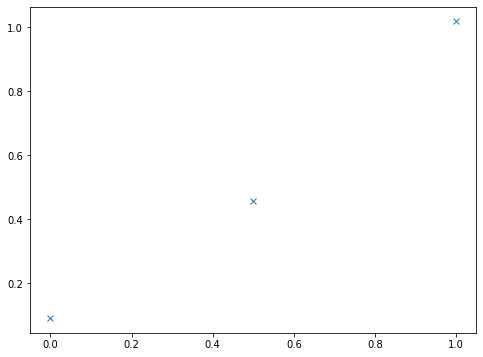

In [ ]:
plt.plot(np.squeeze(X),np.squeeze(y),'x')

In [ ]:
nn = NeuralNetwork()
nn.syn0, nn.syn1

(array([[0.74084971, 0.40276059, 0.20985375, 0.4647498 ]]),
 array([[-0.49312192],
        [ 0.20097791],
        [ 0.62923836],
        [-0.89177268]]))

In [ ]:
nn.forward(X).shape, y.shape

((3, 1), (3, 1))

In [ ]:
for j in range(60000):
    yhat = nn.forward(X)
    
    
    if (j% 10000) == 0:
        print("Error:" + str(np.mean(np.abs(nn.compute_error(y,yhat)))))
    nn.backward(X.T,y,yhat)

Error:0.868250719537274


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

In [ ]:
yhat

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [ ]:
yhat.shape, y.shape

((25, 1), (1, 25))

In [ ]:
nn.compute_error(y,yhat).shape

(25, 25)

In [ ]:
yhat.shape

(25, 1)

In [ ]:
np.atleast_2d(np.array([1])) @nn.syn0

array([[ 0.76605702,  0.08633286, -0.4265767 , -0.72329062]])

In [ ]:
X.T.shape

(25,)

In [ ]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# derivative of sigmoid
# sigmoid(y) * (1.0 - sigmoid(y))
# the way we use this y is already sigmoided
def dsigmoid(y):
    return y * (1.0 - y)   

In [ ]:
class MLP_NeuralNetwork(object):
    def __init__(self, input, hidden, output):
        """
        :param input: number of input neurons
        :param hidden: number of hidden neurons
        :param output: number of output neurons
        """
        self.input = input + 1 # add 1 for bias node
        self.hidden = hidden
        self.output = output
        # set up array of 1s for activations
        self.ai = [1.0] * self.input
        self.ah = [1.0] * self.hidden
        self.ao = [1.0] * self.output
        # create randomized weights
        self.wi = np.random.randn(self.input, self.hidden) 
        self.wo = np.random.randn(self.hidden, self.output) 
        # create arrays of 0 for changes
        self.ci = np.zeros((self.input, self.hidden))
        self.co = np.zeros((self.hidden, self.output))
        
        
    def feedForward(self, inputs):
        if len(inputs) != self.input-1:
            raise ValueError('Wrong number of inputs you silly goose!')
        # input activations
        for i in range(self.input -1): # -1 is to avoid the bias
            self.ai[i] = inputs[i]
        # hidden activations
        for j in range(self.hidden):
            sum = 0.0
            for i in range(self.input):
                sum += self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum)
        # output activations
        for k in range(self.output):
            sum = 0.0
            for j in range(self.hidden):
                sum += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum)
        return self.ao[:]
    

    def backPropagate(self, targets, N):
        """
        :param targets: y values
        :param N: learning rate
        :return: updated weights and current error
        """
        if len(targets) != self.output:
            raise ValueError('Wrong number of targets you silly goose!')
        # calculate error terms for output
        # the delta tell you which direction to change the weights
        output_deltas = [0.0] * self.output
        for k in range(self.output):
            error = -(targets[k] - self.ao[k])
            output_deltas[k] = dsigmoid(self.ao[k]) * error
        # calculate error terms for hidden
        # delta tells you which direction to change the weights
        hidden_deltas = [0.0] * self.hidden
        for j in range(self.hidden):
            error = 0.0
            for k in range(self.output):
                error += output_deltas[k] * self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error
        # update the weights connecting hidden to output
        for j in range(self.hidden):
            for k in range(self.output):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] -= N * change + self.co[j][k]
                self.co[j][k] = change
        # update the weights connecting input to hidden
        for i in range(self.input):
            for j in range(self.hidden):
                change = hidden_deltas[j] * self.ai[i]
                self.wi[i][j] -= N * change + self.ci[i][j]
                self.ci[i][j] = change
        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error += 0.5 * (targets[k] - self.ao[k]) ** 2
        return error
    
    
    def train(self, patterns, iterations = 3000, N = 0.0002):
        # N: learning rate
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.feedForward(inputs)
                error = self.backPropagate(targets, N)
            if i % 500 == 0:
                print('error %-.5f' % error)
                
    def predict(self, X):
        """
        return list of predictions after training algorithm
        """
        predictions = []
        for p in X:
            predictions.append(self.feedForward(p))
        return predictions

# FUCK

In [ ]:
import numpy as np

np.random.seed(0)
a = np.random.randint(1,100, size= 1000).reshape(1000,1)
b = np.random.randint(0,2, size=1000).reshape(1000,1)

y = np.where(b==0,a*2, a*3)

X = np.hstack((a,b))
y = y

from sklearn.preprocessing import StandardScaler

sx = StandardScaler()
X = sx.fit_transform(X)

sy = StandardScaler()
y = sy.fit_transform(y)

w0 = np.random.normal(size=(2,1), scale=0.1)

for i in range(100):
    input_layer = X
    output_layer = X.dot(w0) 

    error = y - output_layer
    square_error = np.sqrt(np.mean(error**2))

    print(square_error)

    w0+= input_layer.T.dot(error) 

1.0017425183036783
993.8307712487162
1003447.5118450113
1013416851.6686966
1023736115364.6744
1034402792944381.8
1.0454145296240604e+18
1.0567691319477582e+21
1.068464573069882e+24
1.0804989972382557e+27
1.092870723522284e+30
1.1055782488334563e+33
1.1186202502870853e+36
1.131995586955025e+39
1.145703301059253e+42
1.1597426186556977e+45
1.1741129498566918e+48
1.1888138886389957e+51
1.203845212282549e+54
1.2192068804830679e+57
1.2348990341793711e+60
1.250921994133934e+63
1.2672762593027187e+66
1.2839625050278347e+69
1.3009815810840919e+72
1.3183345096080502e+75
1.336022482935778e+78
1.354046861373205e+81
1.3724091709207388e+84
1.3911111009716987e+87
1.4101545020021265e+90
1.429541383267645e+93
1.4492739105212897e+96
1.4693544037645988e+99
1.4897853350427543e+102
1.510569326293139e+105
1.5317091472554487e+108
1.5532077134502933e+111
1.5750680842321718e+114
1.5972934609217643e+117
1.6198871850215856e+120
1.6428527365183007e+123
1.666193732274274e+126
1.6899139245103305e+129
1.714017199381

/home/thomas/anaconda3/envs/pytorch_GPU/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/thomas/anaconda3/envs/pytorch_GPU/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square


inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


In [ ]:
import numpy as np

step_size = 1e-6
input_size, output_size = 1, 1
h_size = 10
train_size = 500
x_train = np.abs(np.random.randn(train_size, 1) * 1000)
y_train = np.sqrt(x_train) + np.random.randn(train_size, 1) * 0.5


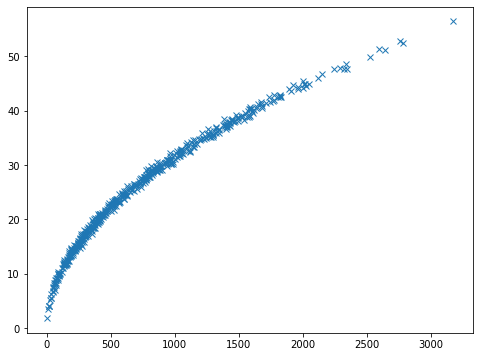

In [ ]:
plt.plot(x_train, y_train,'x')

In [ ]:
# normalise range and domain
x_train -= x_train.mean()
x_train /= x_train.std()
y_train -= y_train.mean()
y_train /= y_train.std()

In [ ]:

#initialize weights and biases
Wxh = np.random.randn(input_size, h_size) * 0.01
bh = np.zeros((1, h_size))
Why = np.random.randn(h_size, output_size) * 0.01
by = np.zeros((1, output_size))

for i in range(30000):
    #forward pass
    h = np.maximum(0, np.dot(x_train, Wxh) + bh)
    y_est = np.dot(h, Why) + by

    loss = np.sum((y_est - y_train)**2) / train_size
    dy = 2 * (y_est - y_train) / train_size
    if i in [0,1,10,200,300]:
        print("loss: ",loss)

    #backprop at output
    dWhy = np.dot(h.T, dy)
    dby = np.sum(dy, axis=0, keepdims=True)
    dh = np.dot(dy, Why.T)

    #backprop ReLU non-linearity    
    dh[h <= 0] = 0

    #backprop Wxh, and bh
    dWxh = np.dot(x_train.T, dh)
    dbh = np.sum(dh, axis=0, keepdims=True)

    Wxh += -step_size * dWxh
    bh += -step_size * dbh
    Why += -step_size * dWhy
    by += -step_size * dby

loss:  1.00013187800603
loss:  1.0001318765465375
loss:  1.0001318634111516
loss:  1.0001315862060924
loss:  1.0001314403578372


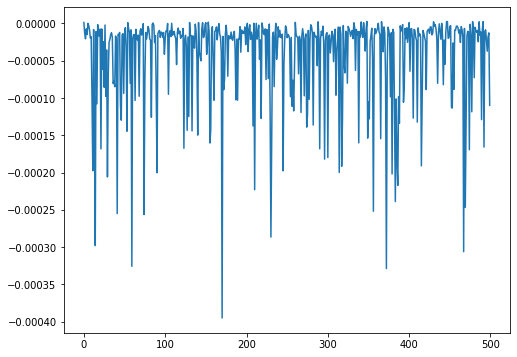

In [ ]:
plt.plot(y_est)

In [ ]:
import numpy as np
trng_input = np.random.uniform(size=(1000, 7))
trng_output = np.column_stack([np.sin(trng_input).sum(axis=1), np.cos(trng_input).sum(axis=1)])

LEAK = 0.0001

def relu(x):
    return x * (x > 0) + LEAK * x * (x < 0)

def reluprime(x):
    return (x>0).astype(x.dtype) + LEAK * (x<0).astype(x.dtype)


class Neural_Net():
    def __init__(self, data_input, data_output):
        self.data_input = data_input
        self.trng_output = trng_output
        self.nodes = np.array([7, 10, 2])
        self.LR = 0.00001
        self.weightinit()
        self.training(2000, self.LR)

    def weightinit(self):
        self.weights = [np.random.uniform(-1, 1, size=self.nodes[i:(i+2)]) for i in range(len(self.nodes) - 1)]
        self.biases = [np.random.uniform(0, 1, size=self.nodes[i+1]) for i in range(len(self.nodes) - 1)]

    def forward(self, data):
        self.Z = []
        self.A = [np.array(data)]
        for layer in range(len(self.weights)):
            self.Z.append(np.dot(self.A[layer], self.weights[layer]) + self.biases[layer])
            self.A.append(relu(self.Z[layer]))
        self.output = self.A[-1]
        return self.output

In [ ]:
nn = NeuralNet()